# CUS610 Final Project

https://www.kaggle.com/code/praxitelisk/telco-customer-churn-eda-ml/data

- customerID =
Customer ID

- gender =
Whether the customer is a male or a female

- SeniorCitizen = 
Whether the customer is a senior citizen or not (1, 0)

- Partner = 
Whether the customer has a partner or not (Yes, No)

- Dependents =
Whether the customer has dependents or not (Yes, No)

- tenure =
Number of months the customer has stayed with the company

- PhoneService = 
Whether the customer has a phone service or not (Yes, No)

- MultipleLines =
Whether the customer has multiple lines or not (Yes, No, No phone service)

- InternetService = 
Customer’s internet service provider (DSL, Fiber optic, No)

- OnlineSecurity = 
Whether the customer has online security or not (Yes, No, No internet service)

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [141]:
%matplotlib inline

In [142]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [143]:
df.loc[ df['TotalCharges'] == ' ', 'TotalCharges'] = 0
df["TotalCharges"] = df["TotalCharges"].astype("float64")

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [145]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [146]:
# Checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

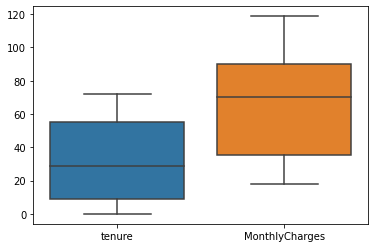

In [147]:
# Checking for outliers
sns.boxplot(data=df[['tenure','MonthlyCharges']])

<AxesSubplot:>

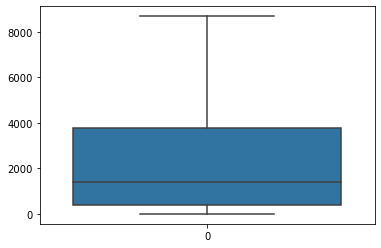

In [148]:
sns.boxplot(data=df['TotalCharges'])

<AxesSubplot:>

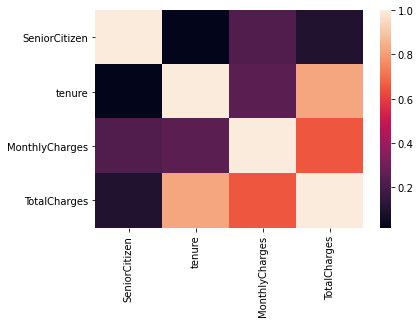

In [149]:
sns.heatmap(df.corr())

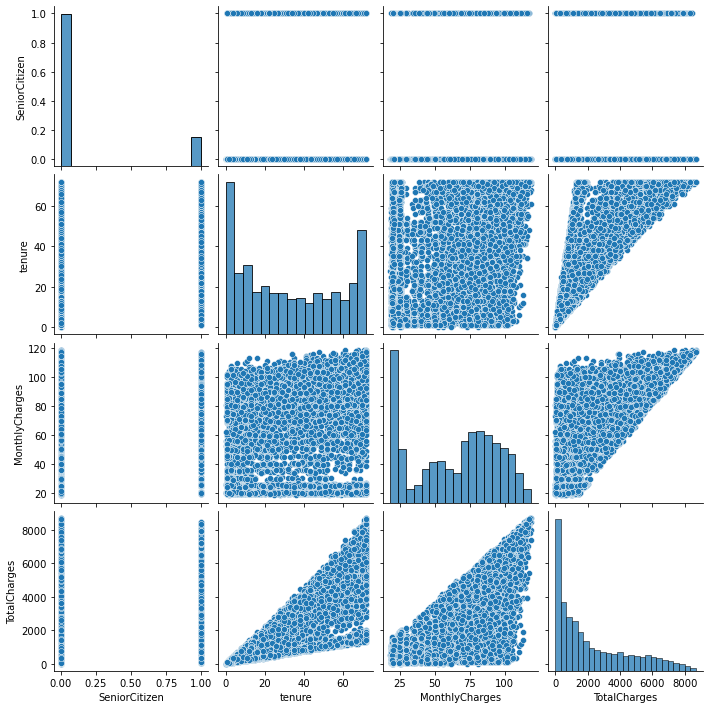

In [150]:
sns.pairplot(df)

In [151]:
churn = df['Churn'].value_counts()
churn

No     5174
Yes    1869
Name: Churn, dtype: int64

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

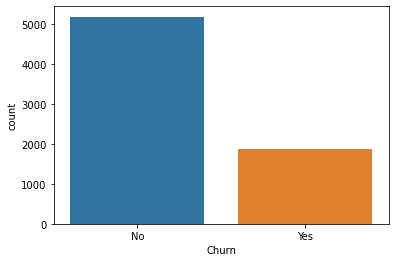

In [152]:
sns.countplot(df['Churn'])

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

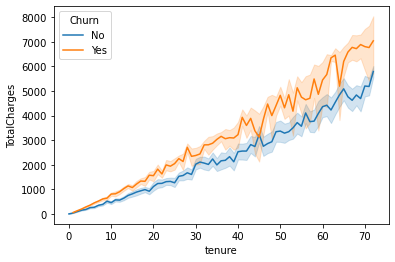

In [153]:
sns.lineplot(x='tenure',y='TotalCharges',hue='Churn',data=df)

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

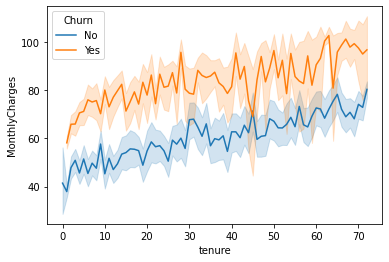

In [154]:
sns.lineplot(x='tenure',y='MonthlyCharges',hue='Churn',data=df)

<AxesSubplot:xlabel='tenure', ylabel='count'>

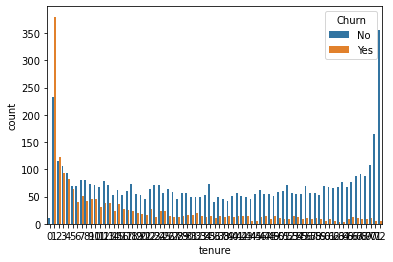

In [155]:
sns.countplot(x='tenure',data=df,hue='Churn')

<AxesSubplot:xlabel='Contract', ylabel='count'>

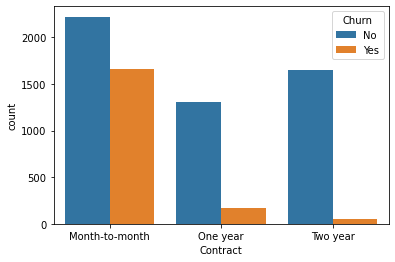

In [156]:
sns.countplot(x='Contract',data=df,hue='Churn')

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

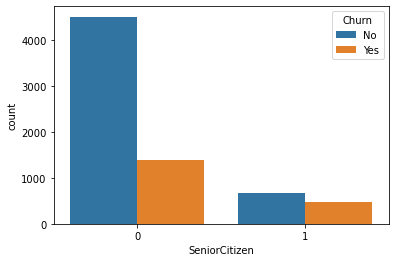

In [157]:
sns.countplot(x='SeniorCitizen',data=df,hue='Churn')

<AxesSubplot:xlabel='InternetService', ylabel='count'>

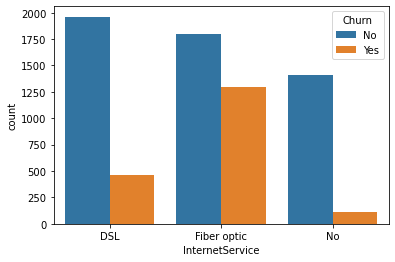

In [158]:
sns.countplot(x='InternetService',data=df,hue='Churn')

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

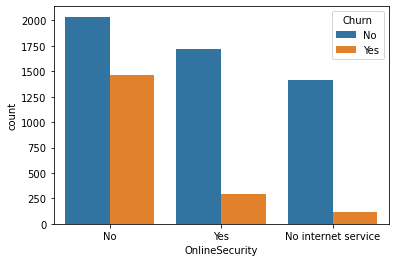

In [159]:
sns.countplot(x='OnlineSecurity',data=df,hue='Churn')

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

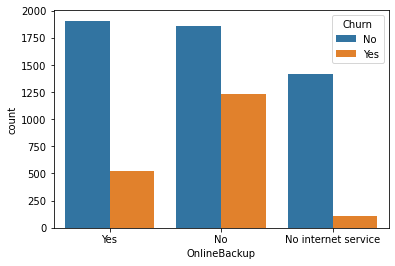

In [160]:
sns.countplot(x='OnlineBackup',data=df,hue='Churn')

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X = df.drop(['Churn','customerID'],axis=1)

In [163]:
X = pd.get_dummies(X)

In [164]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [165]:
y = df['Churn']

In [166]:
y = pd.get_dummies(y,drop_first=True)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Decision Tree

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [169]:
dtree = DecisionTreeClassifier()

In [170]:
dtree2 = dtree.fit(X_train,y_train)

In [171]:
plt.figure(figsize=(250,280))
tree.plot_tree(dtree2,feature_names=X.columns,max_depth=2)
plt.show()

In [172]:
predictions = dtree.predict(X_test)

In [173]:
from sklearn.metrics import classification_report,confusion_matrix

In [174]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1274  265]
 [ 294  280]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1539
           1       0.51      0.49      0.50       574

    accuracy                           0.74      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.74      0.73      2113



#### Random Forest

In [175]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
rfc = RandomForestClassifier(n_estimators=200)

In [177]:
rfc.fit(X_train,y_train)

<ipython-input-177-0b00acaf8842>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=200)

In [178]:
rfc_pred = rfc.predict(X_test)

In [179]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[1400  139]
 [ 303  271]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



### Logistic Regression

In [180]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
LRdf = scaler.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])

In [181]:
LRdf = pd.DataFrame(LRdf,columns = ['tenure','MonthlyCharges','TotalCharges'] )
LRdf.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,0.449599,0.462803,0.262497
std,0.341104,0.299403,0.261007
min,0.000000,0.000000,0.000000
25%,0.125000,0.171642,0.045891
50%,0.402778,0.518408,0.160574
75%,0.763889,0.712438,0.436003
max,1.000000,1.000000,1.000000


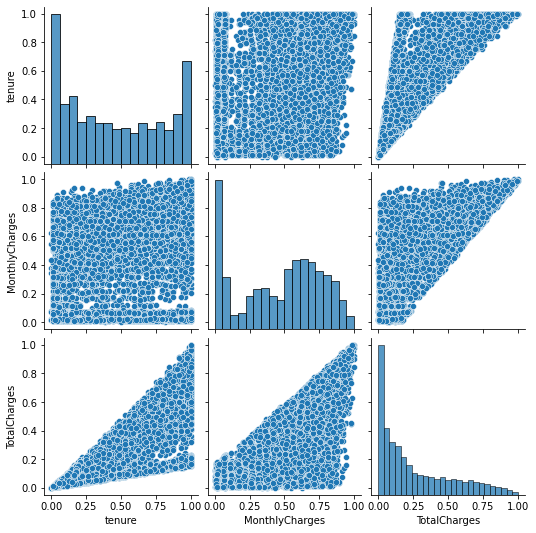

In [183]:
sns.pairplot(LRdf)

In [184]:
#### Replace old numerical columns with normalized ones

In [185]:
df1 = df

In [186]:
df1['tenure'] = LRdf['tenure']
df1['MonthlyCharges'] = LRdf['MonthlyCharges']
df1['TotalCharges'] = LRdf['TotalCharges']

In [187]:
X = df1.drop(['Churn','customerID'],axis=1)
y = df1['Churn']

In [188]:
X = pd.get_dummies(X)

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [191]:
from sklearn.linear_model import LogisticRegression

In [192]:
logmodel = LogisticRegression()

In [193]:
logmodel.fit(X_train,y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [194]:
predictions = logmodel.predict(X_test)

In [195]:
from sklearn.metrics import classification_report

In [196]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1390  149]
 [ 247  327]]
              precision    recall  f1-score   support

          No       0.85      0.90      0.88      1539
         Yes       0.69      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113



In [199]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.003437,No
1,5575-GNVDE,Male,0,No,No,0.472222,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,0.385075,0.217564,No
2,3668-QPYBK,Male,0,No,No,0.027778,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.012453,Yes
3,7795-CFOCW,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.211951,No
4,9237-HQITU,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.017462,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,0.333333,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0.662189,0.229194,No
7039,2234-XADUH,Female,0,Yes,Yes,1.000000,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0.845274,0.847792,No
7040,4801-JZAZL,Female,0,Yes,Yes,0.152778,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.112935,0.039892,No
7041,8361-LTMKD,Male,1,Yes,No,0.055556,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,0.558706,0.035303,Yes


### KMeans Clustering

In [200]:
df1 = df.drop(['Churn','customerID'],axis=1)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.003437
1,Male,0,No,No,0.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.217564
2,Male,0,No,No,0.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.012453
3,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.211951
4,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.017462


In [201]:
clustdf = pd.get_dummies(df1)

In [202]:
from sklearn.cluster import KMeans

#### Using elbow method to find k

In [203]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(clustdf)
    distortions.append(kmeans.inertia_)

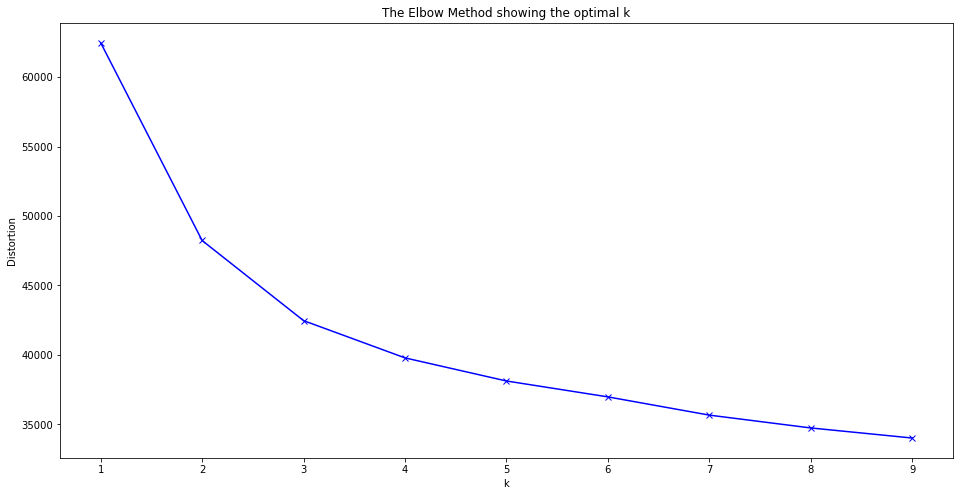

In [204]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [205]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(clustdf)

KMeans(n_clusters=3)

In [206]:
clustdf['k_means'] = kmeans.predict(clustdf)

In [207]:
clustdf['customerID'] = df['customerID']

In [208]:
clustdf

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,k_means,customerID
0,0,0.013889,0.115423,0.003437,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,2,7590-VHVEG
1,0,0.472222,0.385075,0.217564,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,2,5575-GNVDE
2,0,0.027778,0.354229,0.012453,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,2,3668-QPYBK
3,0,0.625000,0.239303,0.211951,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,0,7795-CFOCW
4,0,0.027778,0.521891,0.017462,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,2,9237-HQITU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.333333,0.662189,0.229194,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,0,6840-RESVB
7039,0,1.000000,0.845274,0.847792,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,2234-XADUH
7040,0,0.152778,0.112935,0.039892,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,2,4801-JZAZL
7041,1,0.055556,0.558706,0.035303,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,2,8361-LTMKD


In [209]:
clustdf['k_means'].value_counts()

2    3017
0    2500
1    1526
Name: k_means, dtype: int64

In [137]:
clustdf[clustdf['k_means'] == 0].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,k_means
count,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,...,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.0
mean,0.219423,0.236304,0.502257,0.138475,0.489891,0.510109,0.708651,0.291349,0.839907,0.160093,...,0.922108,0.067285,0.010607,0.305602,0.694398,0.141200,0.137554,0.525688,0.195559,0.0
std,0.413924,0.228966,0.199120,0.145016,0.499981,0.499981,0.454459,0.454459,0.366753,0.366753,...,0.268046,0.250557,0.102458,0.460738,0.460738,0.348285,0.344488,0.499422,0.396696,0.0
min,0.000000,0.013889,0.051741,0.002700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.041667,0.328358,0.023881,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.152778,0.549751,0.088143,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,0.000000,0.361111,0.663184,0.209020,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,1.000000,0.986111,0.882090,0.800381,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [138]:
clustdf[clustdf['k_means'] == 1].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,k_means
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,...,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.0
mean,0.034076,0.424266,0.028151,0.076295,0.489515,0.510485,0.516383,0.483617,0.578637,0.421363,...,0.343381,0.238532,0.418087,0.707733,0.292267,0.217562,0.216907,0.079948,0.485583,1.0
std,0.181484,0.338285,0.021535,0.063977,0.500054,0.500054,0.499895,0.499895,0.493939,0.493939,...,0.474993,0.426326,0.493406,0.454954,0.454954,0.412723,0.412274,0.271301,0.499956,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.111111,0.014428,0.018173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,0.347222,0.018905,0.059783,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,0.000000,0.732639,0.026368,0.127654,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,1.000000,1.000000,0.086070,0.231088,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [139]:
clustdf[clustdf['k_means'] == 2].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,k_means
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.00000,2500.000000,2500.000000,...,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.0
mean,0.171200,0.722467,0.680501,0.525825,0.505200,0.494800,0.28600,0.71400,0.606400,0.393600,...,0.227600,0.36240,0.410000,0.348000,0.652000,0.314400,0.31040,0.262800,0.112400,2.0
std,0.376759,0.254877,0.199540,0.234482,0.500073,0.500073,0.45198,0.45198,0.488646,0.488646,...,0.419367,0.48079,0.491932,0.476431,0.476431,0.464369,0.46275,0.440243,0.315921,0.0
min,0.000000,0.000000,0.148259,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.0
25%,0.000000,0.555556,0.525871,0.347832,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.0
50%,0.000000,0.791667,0.719900,0.536647,1.000000,0.000000,0.00000,1.00000,1.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.0
75%,0.000000,0.944444,0.853234,0.708055,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,...,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,2.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.0
